# Lorenz equations


## Model description

The model is a system of three ordinary differential equations now known as
the Lorenz equations:

$$
  \begin{array}{lcl}
  \dfrac{dx}{dt} & = & \sigma (y-x), \\ \\
  \dfrac{dy}{dt} & = & x(\rho - z) - y, \\ \\
  \dfrac{dz}{dt} & = & xy-\beta z
  \end{array}
$$

The equations relate the properties of a two-dimensional fluid layer uniformly
warmed from below and cooled from above. In particular, the equations describe
the rate of change of three quantities with respect to time:``x`` is
proportional to the rate of convection, ``y`` to the horizontal temperature
variation, and ``z`` to the vertical temperature variation. The constants
``\sigma`` , ``\rho`` , and ``\beta``  are system parameters proportional to
the Prandtl number, Rayleigh number, and certain physical dimensions of the
layer itself.

In [1]:
using ReachabilityAnalysis, Plots

@taylorize function lorenz!(dx, x, params, t)
    local σ = 10.0
    local β = 8.0 / 3.0
    local ρ = 28.0
    dx[1] = σ * (x[2] - x[1])
    dx[2] = x[1] * (ρ - x[3]) - x[2]
    dx[3] = x[1] * x[2] - β * x[3]
    return dx
end

## Reachability settings

The initial values considered are ``X_0 \in [0.9, 1.1] \times [0, 0] \times [0, 0]``,
for a time span of `10`.

In [2]:
X0 = Hyperrectangle(low=[0.9, 0.0, 0.0], high=[1.1, 0.0, 0.0])
prob = @ivp(x' = lorenz!(x), dim=3, x(0) ∈ X0);

## Results

We compute the flowpipe using the TMJets algorithm with ``n_T=10`` and ``n_Q=2``.

In [3]:
alg = TMJets(abstol=1e-15, orderT=10, orderQ=2, maxsteps=50_000);

sol = solve(prob, T=10.0, alg=alg);

solz = overapproximate(sol, Zonotope);

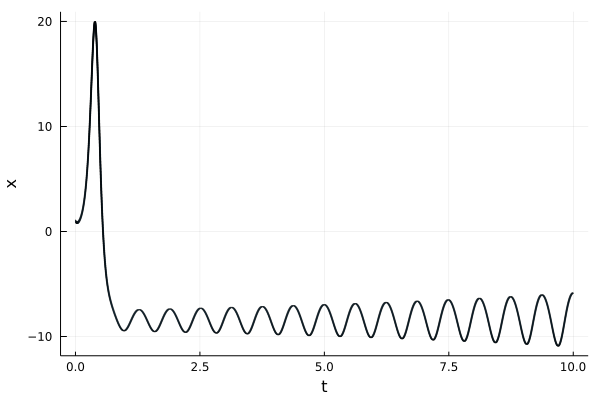

In [4]:
plot(solz, vars=(0, 1), xlab="t", ylab="x")

It is apparent by inspection that variable $x(t)$ does not exceed 20.0 in the computed
time span:

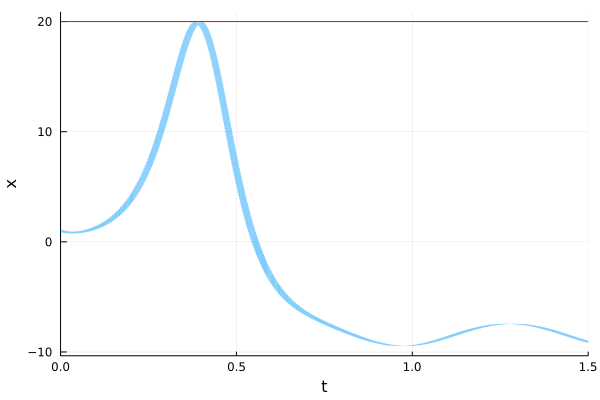

In [5]:
plot(solz(0.0 .. 1.5), vars=(0, 1), xlab="t", ylab="x", lw=0.0)
plot!(x -> 20.0, c=:red, xlims=(0.0, 1.5), lab="")

We can prove that it is the case by computing the support function of the flowpipe
along direction `[1.0, 0.0, 0.0]`:

In [6]:
ρ([1.0, 0.0, 0.0], solz(0.0 .. 1.5))

19.991791450503634

In a similar fashion, we can compute extremal values of variable $y(t)$:

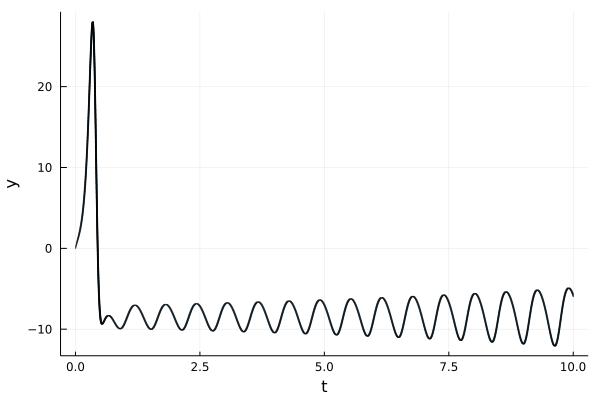

In [7]:
plot(solz, vars=(0, 2), xlab="t", ylab="y")

Since we have computed overapproximations of the exact flowipe, the following
quantities are a lower bound on the exact minimum (resp. an uppper bound on the
exact maximum):

In [8]:
-ρ([0.0, -1.0, 0.0], solz)

ρ([0.0, 1.0, 0.0], solz)

28.05101124282887

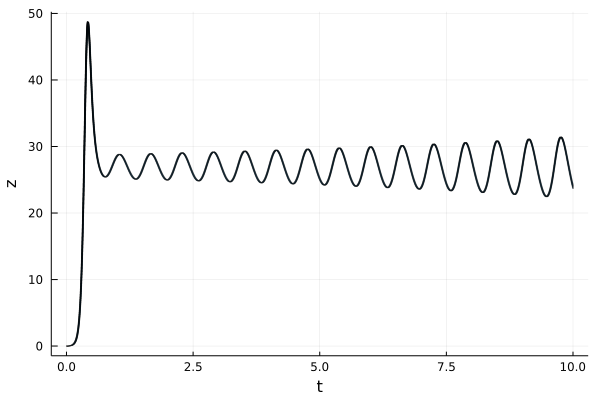

In [9]:
plot(solz, vars=(0, 3), xlab="t", ylab="z")

Below we plot the flowpipe projected on the `(1, 3)` plane.

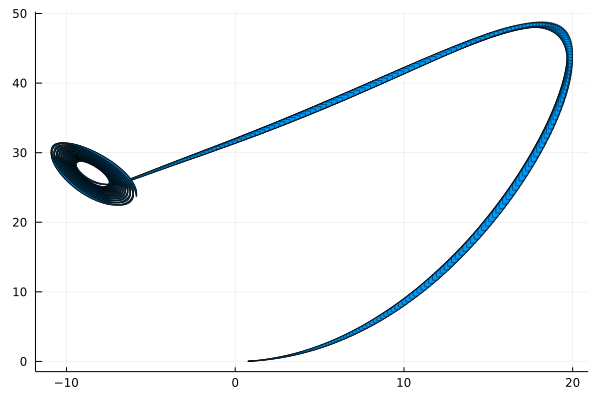

In [10]:
plot(solz, vars=(1, 3))